Generate correlation matrices of sensor data within the same timeframe

AUTHOR: DARREN WU

Date: 3/7/2022

Revised from Carmen's code

In [4]:
import pandas as pd
import os
import glob
import matplotlib as plt
import seaborn as sns

Setup PATH (Directory where air sensor data is stored)



In [5]:
PATH = r"C:\Users\wudar\Desktop\Bergin_Research\sensorCompare"
joined_files = os.path.join(PATH, "*.csv")
joined_list = glob.glob(joined_files)
new_df = pd.DataFrame(columns = ['Filler'])

for file in joined_list:
    df = pd.read_csv(file, skiprows = [1])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = '%m/%d/%Y %H:%M')
    
    #extract filename w/o extension & directory list
    col_name = (os.path.splitext(os.path.basename(file))[0]).split(' (')[0]
    
    df.set_index(df['Timestamp'], inplace = True)

    #USE start_time and end_time as arguments to create time interval for measurement

    start_time = '2022-03-07 00:00:00'
    end_time = '2022-03-09 00:00:00'
    
    time_index = [df.loc[(df['Timestamp'] > start_time) & (df['Timestamp'] <= end_time)]['Timestamp'].dt.strftime('%m %d %H')]
    #time_index = [df['Timestamp'].dt.strftime('%m %d %H')]
    df_hour_means = df.groupby(time_index)['PM2.5'].mean()
    new_df.insert(len(new_df.columns), col_name, df_hour_means)


new_df.drop(new_df.columns[0], axis = 1, inplace = True)

#Pearson r correlation analysis method, can change parameter of corr() if needed

corr = new_df[new_df.columns].corr(method = 'pearson')
corr
#cmap = sns.diverging_palette(5, 250, as_cmap=True)
#corr.style.background_gradient(cmap = 'coolwarm')

#fig1 = sns.heatmap(corr, cmap = "coolwarm", annot = True)
#plt.rcParams['figure.figsize']=(5,5)

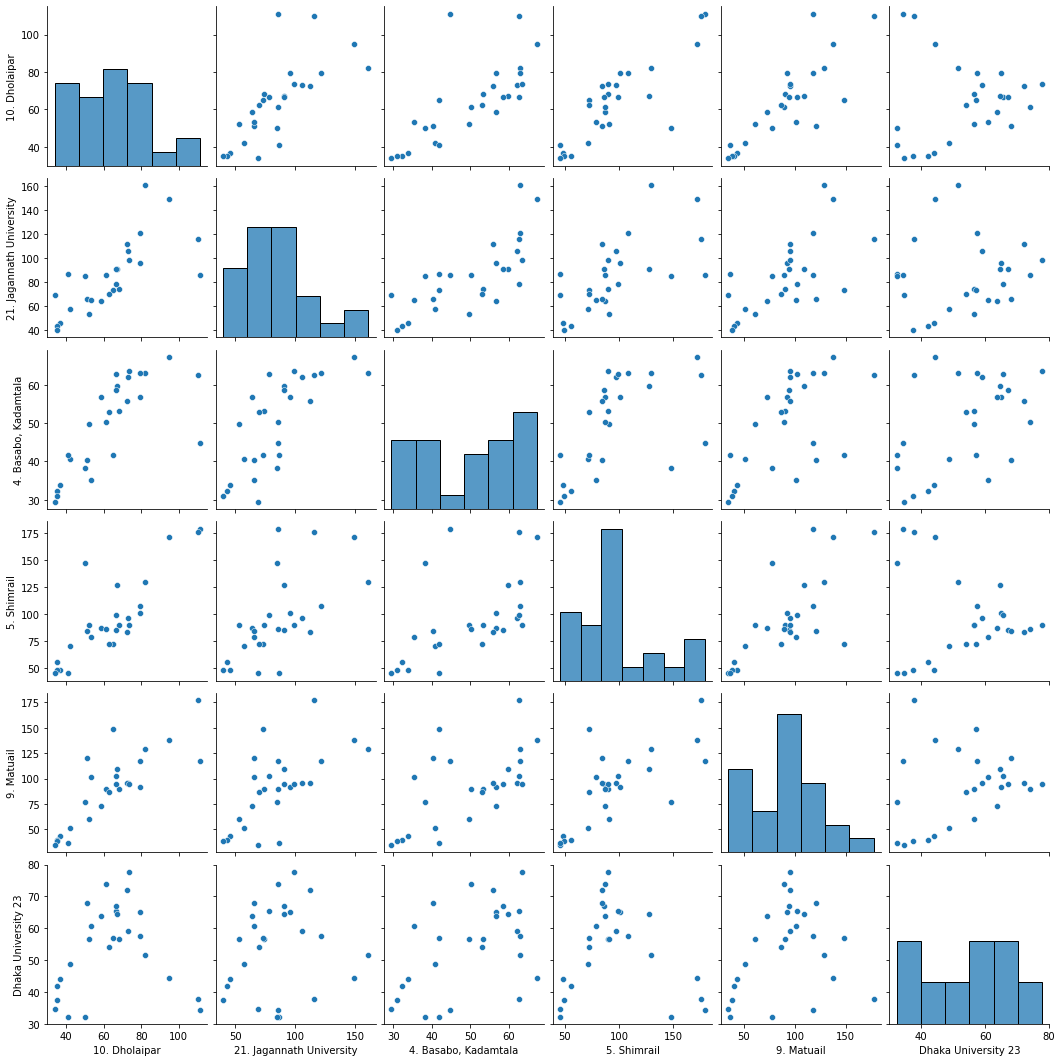

In [6]:
#pd.plotting.scatter_matrix(new_df)
sns.pairplot(new_df)